In [1]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [4]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="SingBuri",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สำหรับปลูกพืชไร่ (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,1517.167364,42.410974,2247.735336,251.360573,20.751178,540.088489,1553.350483,662.278852,43.742963,80.752569,...,48.223830,37.278020,59467272,0.11918,12384.870133,407634.682481,110908.827139,342336.266980,10,143862.554
1996,2151.732729,39.837997,2525.526291,268.322033,21.818723,412.596415,1778.579003,737.967580,37.939543,90.268175,...,45.255728,37.081286,60130190,0.11918,13039.348373,414866.326298,110942.848884,342215.983314,10,171503.917
1997,2438.909192,28.967616,2434.777758,282.656660,23.104803,399.625836,1934.577471,790.819202,44.211324,89.376423,...,46.814732,36.564600,60846588,0.10214,13222.127602,416885.941624,110952.350297,342182.391127,10,179223.451
1998,2872.227679,23.722862,2635.233786,362.892721,23.570355,241.360017,1787.959114,724.545611,45.740985,87.423898,...,42.303171,36.111727,61585103,0.17525,13255.000370,417249.168605,110954.059123,342176.349586,10,180611.806
1999,1738.973389,18.169377,2775.669860,310.675285,26.850346,240.759815,1607.285461,736.278279,63.183246,98.627151,...,44.267746,36.378900,62298569,0.24836,13473.896446,419667.856278,110965.437998,342136.119643,10,189856.706


## Principal Component Analysis : Scikit-Learn

In [5]:
X = df.drop('GPP Per capita (Baht)',1)
y = df['GPP Per capita (Baht)']

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_5678/3021477077.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('GPP Per capita (Baht)',1)


In [6]:
# Split data into training and test sets using ratio = 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [7]:
# First, compute mean and SD 
mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [8]:
# Normalize the input matrix for training data
scaled_X_train = (X_train-mean_X_train)/std_X_train
scaled_X_train

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สำหรับปลูกพืชไร่ (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,,,,,,,,,,,,,
1999,-1.112213,-1.061419,-1.459161,-1.187658,-0.812727,-1.551110,-1.023406,1.695207,-1.506147,-2.031106,...,-0.565718,-1.994533,-0.725911,-1.323263,-0.487482,-1.032942,-1.244240,-0.898537,-0.538193,0.988632
2017,0.285184,0.227897,0.726995,1.060482,2.241668,1.093914,1.853512,2.047924,1.397537,1.059914,...,-1.085901,-0.663574,-1.737192,1.240212,2.613591,1.102151,1.195099,2.140391,1.242978,-1.271099
1995,-1.298644,0.112680,-1.702834,-1.481982,-0.980160,-0.099911,-1.113277,0.262679,-2.420023,-2.519337,...,-0.364491,-1.465393,-0.057403,-2.373429,-1.019179,-1.375439,-1.650863,-1.021458,-0.418879,0.988632
2015,-0.351736,1.185049,0.722411,1.108632,1.967256,0.924025,0.780368,-0.561053,0.600904,0.704112,...,-0.587390,-0.264403,-0.874407,1.056499,1.026073,1.691528,1.178034,0.865813,1.291264,-1.271099
2016,-0.509343,0.477317,0.896680,1.037226,1.414439,1.082599,1.192514,0.573155,0.982040,0.306192,...,-1.009288,-0.759107,-1.314873,1.151748,1.693185,0.824977,1.177088,0.646508,1.314513,1.553565
2004,-0.281872,-1.205081,-0.356134,-0.622964,-0.617252,-0.778126,-0.762926,-0.791195,1.107934,0.440259,...,-0.140113,0.302315,0.406758,-0.323008,-0.528970,-0.423008,-0.520107,-0.679633,-0.750673,0.423700
2013,2.171808,0.761778,0.840921,1.397388,0.003863,1.285043,1.171474,-1.296729,0.041147,0.846477,...,2.031246,0.817415,-0.339516,0.845079,0.308047,1.685678,1.173371,1.465103,1.238208,-0.141233
2008,1.837765,0.863414,0.594534,-0.048007,-0.462968,0.121618,0.498047,0.803914,0.401333,-0.009226,...,0.695164,1.316243,1.579509,0.246595,-0.672905,-0.932899,0.954447,-0.233878,-1.183347,-0.706166
2003,-0.614960,-1.219252,-0.506710,-0.891912,-0.712844,-1.218432,-0.985420,-1.540050,-0.125303,0.393491,...,0.020507,-0.536284,0.418560,-0.488226,-0.499912,-0.534870,-0.652913,-0.719780,-0.711704,0.423700


In [9]:
# Compute covariance matrix of normalized input
cov_scaled_X_train = np.cov(scaled_X_train.T)
cov_scaled_X_train.shape

# Notice that original dimension of variables = p = 4
# Hence, covariance matrix has size = pxp = 4x4

(30, 30)

In [10]:
# Compute eigenvalues and eigenvectors of covariance matrix
from numpy.linalg import eig

eig_values, eig_vectors = eig(cov_scaled_X_train)
eig_values.shape

# Results have 4 eigenvalues

(30,)

In [11]:
# Results have 4 correponding eigenvectors

eig_vectors.shape

(30, 30)

In [12]:
# Matching each pair of eigenvalue and eigenvector and store them in eig_pairs
# Sort eig_pairs using eigenvalues from max to min

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(17.3397408249113,
  array([ 0.14821117+0.j,  0.15299466+0.j,  0.21585204+0.j,  0.23316444+0.j,
          0.19798269+0.j,  0.20666178+0.j,  0.23107199+0.j, -0.01225461+0.j,
          0.18658726+0.j,  0.19401648+0.j,  0.20406801+0.j,  0.13945617+0.j,
          0.19625498+0.j,  0.20858431+0.j,  0.0849396 +0.j,  0.22361493+0.j,
          0.21979354+0.j,  0.19604259+0.j,  0.18764432+0.j,  0.10807515+0.j,
          0.0638593 +0.j,  0.09413271+0.j, -0.06978086+0.j,  0.23215432+0.j,
          0.19601023+0.j,  0.21816854+0.j,  0.22493141+0.j,  0.22238038+0.j,
          0.18986784+0.j, -0.13407415+0.j])),
 (5.578234168426899,
  array([ 0.24006421+0.j,  0.05222119+0.j,  0.1245023 +0.j,  0.02278763+0.j,
         -0.18714036+0.j, -0.01105088+0.j, -0.03881408+0.j, -0.22574558+0.j,
          0.10394674+0.j,  0.16151539+0.j, -0.12746258+0.j,  0.16796337+0.j,
         -0.15640569+0.j,  0.09377355+0.j,  0.30945201+0.j, -0.07517974+0.j,
         -0.08533563+0.j,  0.01719415+0.j, -0.23742667+0.j,  0.354

In [13]:
# First, obtain mean and variance of input matrix of traning data
# (Later on, mean and SD will be used to normalize input matrix.)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [14]:
# Show mean of input matrix of training data, computed by Scikit-Learn

scaler.mean_

array([3.06222236e+03, 4.00844631e+01, 5.93703483e+03, 5.50022394e+02,
       5.64558773e+01, 5.60696356e+02, 2.22147149e+03, 6.48709753e+02,
       9.52225278e+01, 1.72987758e+02, 8.94755856e+02, 7.96580503e+02,
       1.61073581e+00, 2.57575746e+01, 9.53111324e+02, 2.18151836e+03,
       8.03967323e+02, 6.43466211e+01, 2.57415796e+02, 1.06305638e+02,
       9.42217249e+00, 5.91797705e+01, 3.73552258e+01, 6.58661476e+07,
       3.66797500e-01, 1.67583073e+04, 4.56488534e+05, 1.11379254e+05,
       3.43038929e+05, 8.25000000e+00])

In [15]:
# Show mean of input matrix of training data, computed manually earlier

mean_X_train

Agriculture, forestry and fishing                                      3.062222e+03
Mining and quarrying                                                   4.008446e+01
Manufacturing                                                          5.937035e+03
Electricity, gas, steam and air conditioning supply                    5.500224e+02
Water supply; sewerage, waste management and remediation activities    5.645588e+01
Construction                                                           5.606964e+02
Wholesale and retail trade and repair of motor vehicles                2.221471e+03
Transportation and storage                                             6.487098e+02
Accommodation and food service activities                              9.522253e+01
Information and communication                                          1.729878e+02
Financial and insurance activities                                     8.947559e+02
Real estate activities                                                 7.965

In [16]:
# Show SD of input matrix of training data, computed by Scikit-Learn 

np.sqrt(scaler.var_)

array([1.15196506e+03, 1.99913452e+01, 2.09776662e+03, 1.95129323e+02,
       3.52706940e+01, 1.99713297e+02, 5.81082036e+02, 5.00162261e+01,
       2.05968556e+01, 3.54483523e+01, 3.68648156e+02, 1.41090065e+02,
       1.20421853e+00, 1.30618230e+01, 1.91410682e+02, 1.34078703e+03,
       2.08811991e+02, 3.16315782e+01, 2.97230463e+02, 1.25125684e+01,
       9.05704351e-01, 7.23904230e+00, 1.30225866e+00, 2.61043560e+06,
       2.35242937e-01, 3.07869848e+03, 2.86532177e+04, 4.45920508e+02,
       1.62421404e+03, 1.71391365e+00])

In [17]:
# Show SD of input matrix of training data, computed manually earlier

std_X_train

# SD's computed by Scikit-Learn and by manually have little difference
# This will contribute to the difference in eigenvalues later

Agriculture, forestry and fishing                                      1.189744e+03
Mining and quarrying                                                   2.064697e+01
Manufacturing                                                          2.166564e+03
Electricity, gas, steam and air conditioning supply                    2.015287e+02
Water supply; sewerage, waste management and remediation activities    3.642742e+01
Construction                                                           2.062630e+02
Wholesale and retail trade and repair of motor vehicles                6.001389e+02
Transportation and storage                                             5.165654e+01
Accommodation and food service activities                              2.127234e+01
Information and communication                                          3.661090e+01
Financial and insurance activities                                     3.807382e+02
Real estate activities                                                 1.457

In [18]:
# Normalize input matrix for training data set using mean and SD (by using function transform)
# Then, use the same mean and SD from train to normalize input matrix for test data set

sk_scaled_X_train = scaler.transform(X_train)
sk_scaled_X_test = scaler.transform(X_test)

# Note that: 
# scaler = StandardScaler().fit(X_train)
# sk_scaled_X_train = scaler.transform(X_train)
# are equivalent to:
# scaler = StandardScaler()
# sk_scaled_X_train = scaler.fit_transform(X_train)

#### components = 2

In [19]:
# Select number of principal components and perform PCA
# From manual steps, we know that number of selected principal components should be 2.
# On the other hand, you can perform PCA multiple times with different numbers of principal components
# and check explained_variance_ratio_ afterward to find appropriate number of selected principal components

from sklearn.decomposition import PCA

num_components=2
pca2 = PCA(n_components=num_components)
pca2.fit(sk_scaled_X_train)

PCA(n_components=2)

In [20]:
# Show variances (or eigenvalues) of selected components

pca2.explained_variance_

array([18.49572355,  5.95011645])

In [21]:
# Show principal components (or eigenvectors) of selected components

pca2.components_

array([[-0.14821117, -0.15299466, -0.21585204, -0.23316444, -0.19798269,
        -0.20666178, -0.23107199,  0.01225461, -0.18658726, -0.19401648,
        -0.20406801, -0.13945617, -0.19625498, -0.20858431, -0.0849396 ,
        -0.22361493, -0.21979354, -0.19604259, -0.18764432, -0.10807515,
        -0.0638593 , -0.09413271,  0.06978086, -0.23215432, -0.19601023,
        -0.21816854, -0.22493141, -0.22238038, -0.18986784,  0.13407415],
       [-0.24006421, -0.05222119, -0.1245023 , -0.02278763,  0.18714036,
         0.01105088,  0.03881408,  0.22574558, -0.10394674, -0.16151539,
         0.12746258, -0.16796337,  0.15640569, -0.09377355, -0.30945201,
         0.07517974,  0.08533563, -0.01719415,  0.23742667, -0.35434517,
        -0.27625742, -0.36578014, -0.35744913, -0.05296724,  0.22661896,
         0.03569814, -0.00740031,  0.08616212,  0.16516298,  0.04904151]])

In [22]:
# Compare results from explained_variance_ and components_ from Scikit-learn
# to eig_paris from manual steps

eig_pairs

[(17.3397408249113,
  array([ 0.14821117+0.j,  0.15299466+0.j,  0.21585204+0.j,  0.23316444+0.j,
          0.19798269+0.j,  0.20666178+0.j,  0.23107199+0.j, -0.01225461+0.j,
          0.18658726+0.j,  0.19401648+0.j,  0.20406801+0.j,  0.13945617+0.j,
          0.19625498+0.j,  0.20858431+0.j,  0.0849396 +0.j,  0.22361493+0.j,
          0.21979354+0.j,  0.19604259+0.j,  0.18764432+0.j,  0.10807515+0.j,
          0.0638593 +0.j,  0.09413271+0.j, -0.06978086+0.j,  0.23215432+0.j,
          0.19601023+0.j,  0.21816854+0.j,  0.22493141+0.j,  0.22238038+0.j,
          0.18986784+0.j, -0.13407415+0.j])),
 (5.578234168426899,
  array([ 0.24006421+0.j,  0.05222119+0.j,  0.1245023 +0.j,  0.02278763+0.j,
         -0.18714036+0.j, -0.01105088+0.j, -0.03881408+0.j, -0.22574558+0.j,
          0.10394674+0.j,  0.16151539+0.j, -0.12746258+0.j,  0.16796337+0.j,
         -0.15640569+0.j,  0.09377355+0.j,  0.30945201+0.j, -0.07517974+0.j,
         -0.08533563+0.j,  0.01719415+0.j, -0.23742667+0.j,  0.354

In [23]:
# Show explained_variance_ratio_  (or percent of transformation along each component)

pca2.explained_variance_ratio_

array([0.57799136, 0.18594114])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

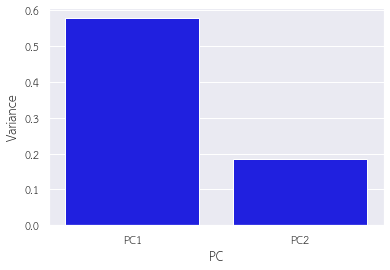

In [24]:
# Plot to see explained_variance_ratio_ using bar graph

temp_df = pd.DataFrame({'Variance':pca2.explained_variance_ratio_,
                        'PC':['PC1','PC2']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [25]:
# Transform input data of original matrix to the new space

sk_X_train_transformed  = pca2.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

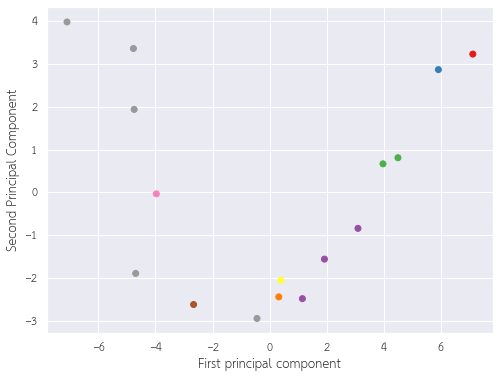

In [26]:
# Plot the new space with the transformed input data

plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [27]:
# The transformed data can also be converted back to the original data
# Since we use new space with lower dimension, 
# the derived X_train will not be the same as the original X_train

sk_derived_X_train = pca2.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-4.16763276e-01,  4.13697115e-02, -1.27041613e-01,
        -2.18058737e-01,  2.05080684e-01,  4.11167215e-01,
        -1.98593938e-01, -1.03068422e+00,  1.53573365e-01,
         4.86645418e-01,  5.42725265e-01, -8.06307368e-01,
         1.19177494e-01,  2.17277169e-01, -4.19700454e-02,
        -1.71744335e-01, -1.70851771e-01,  4.41310288e-02,
         2.45057672e-01, -2.59675715e-02, -5.86025949e-01,
         4.53738149e-01,  1.37047941e-01, -1.58610775e-01,
        -5.90535300e-03, -1.21353868e-01, -6.67747751e-02,
        -1.40309808e-01, -9.35018463e-02, -8.72428615e-02],
       [-1.97849608e-01,  6.43224964e-01,  2.86351773e-01,
         4.69874142e-01, -1.64026431e-01,  3.81866816e-01,
        -1.18742476e-01, -1.30326046e+00, -5.32165264e-01,
        -3.59931059e-01,  2.50002918e-01, -4.78599439e-01,
        -9.57163763e-01, -3.83404493e-01, -4.69932735e-01,
         6.16676024e-01,  7.83118448e-02, -4.66451206e-01,
        -4.64371471e-02, -1.70908536e-01,  4.75046152e-

<AxesSubplot:>

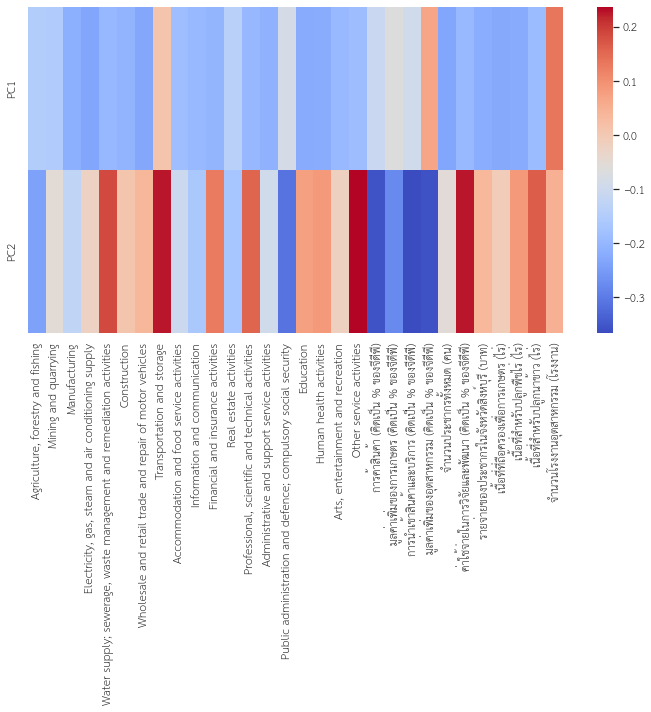

In [28]:
# Plot to see correlation between selected principal components and original variables

temp_df3 = pd.DataFrame(pca2.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

# The result shows that principal component 1 correlates with sepal length, petal width, petal length
# Principal component 2 correlates with petal width and petal length

#### components = 3

In [29]:
num_components=3
pca3 = PCA(n_components=num_components)
pca3.fit(sk_scaled_X_train)

PCA(n_components=3)

In [30]:
pca3.explained_variance_

array([18.49572355,  5.95011645,  2.52712881])

In [31]:
pca3.components_

array([[-0.14821117, -0.15299466, -0.21585204, -0.23316444, -0.19798269,
        -0.20666178, -0.23107199,  0.01225461, -0.18658726, -0.19401648,
        -0.20406801, -0.13945617, -0.19625498, -0.20858431, -0.0849396 ,
        -0.22361493, -0.21979354, -0.19604259, -0.18764432, -0.10807515,
        -0.0638593 , -0.09413271,  0.06978086, -0.23215432, -0.19601023,
        -0.21816854, -0.22493141, -0.22238038, -0.18986784,  0.13407415],
       [-0.24006421, -0.05222119, -0.1245023 , -0.02278763,  0.18714036,
         0.01105088,  0.03881408,  0.22574558, -0.10394674, -0.16151539,
         0.12746258, -0.16796337,  0.15640569, -0.09377355, -0.30945201,
         0.07517974,  0.08533563, -0.01719415,  0.23742667, -0.35434517,
        -0.27625742, -0.36578014, -0.35744913, -0.05296724,  0.22661896,
         0.03569814, -0.00740031,  0.08616212,  0.16516298,  0.04904151],
       [ 0.19102452,  0.36270436,  0.08203331,  0.10115187, -0.12872407,
         0.25515774,  0.09302693, -0.10894308, -0

In [32]:
eig_pairs

[(17.3397408249113,
  array([ 0.14821117+0.j,  0.15299466+0.j,  0.21585204+0.j,  0.23316444+0.j,
          0.19798269+0.j,  0.20666178+0.j,  0.23107199+0.j, -0.01225461+0.j,
          0.18658726+0.j,  0.19401648+0.j,  0.20406801+0.j,  0.13945617+0.j,
          0.19625498+0.j,  0.20858431+0.j,  0.0849396 +0.j,  0.22361493+0.j,
          0.21979354+0.j,  0.19604259+0.j,  0.18764432+0.j,  0.10807515+0.j,
          0.0638593 +0.j,  0.09413271+0.j, -0.06978086+0.j,  0.23215432+0.j,
          0.19601023+0.j,  0.21816854+0.j,  0.22493141+0.j,  0.22238038+0.j,
          0.18986784+0.j, -0.13407415+0.j])),
 (5.578234168426899,
  array([ 0.24006421+0.j,  0.05222119+0.j,  0.1245023 +0.j,  0.02278763+0.j,
         -0.18714036+0.j, -0.01105088+0.j, -0.03881408+0.j, -0.22574558+0.j,
          0.10394674+0.j,  0.16151539+0.j, -0.12746258+0.j,  0.16796337+0.j,
         -0.15640569+0.j,  0.09377355+0.j,  0.30945201+0.j, -0.07517974+0.j,
         -0.08533563+0.j,  0.01719415+0.j, -0.23742667+0.j,  0.354

In [33]:
pca3.explained_variance_ratio_

array([0.57799136, 0.18594114, 0.07897278])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

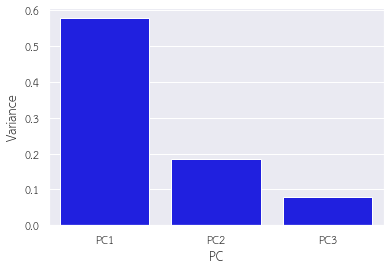

In [34]:
temp_df = pd.DataFrame({'Variance':pca3.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [35]:
sk_X_train_transformed  = pca3.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

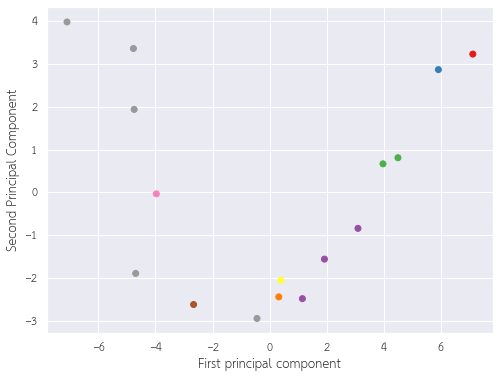

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [37]:
sk_derived_X_train = pca3.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-4.10852981e-01,  5.25917767e-02, -1.24503504e-01,
        -2.14929100e-01,  2.01097965e-01,  4.19061790e-01,
        -1.95715686e-01, -1.03405492e+00,  1.43776876e-01,
         4.80070275e-01,  5.47536667e-01, -8.15135190e-01,
         1.13630184e-01,  2.16354303e-01, -5.15589182e-02,
        -1.67222341e-01, -1.74710634e-01,  3.69734570e-02,
         2.41634443e-01, -2.96749829e-02, -5.75082861e-01,
         4.53668533e-01,  1.38735913e-01, -1.61208918e-01,
        -9.57500191e-03, -1.19425959e-01, -6.53116269e-02,
        -1.37106900e-01, -8.81833980e-02, -9.16286268e-02],
       [-5.30438551e-01,  1.17277146e-02,  1.43525228e-01,
         2.93760652e-01,  6.00924446e-02, -6.23831779e-02,
        -2.80709781e-01, -1.11358186e+00,  1.91107765e-02,
         1.00707757e-02, -2.07482672e-02,  1.81670002e-02,
        -6.45001011e-01, -3.31472233e-01,  6.96601713e-02,
         3.62210703e-01,  2.95460942e-01, -6.36744622e-02,
         1.46197571e-01,  3.77179569e-02, -1.40752250e-

<AxesSubplot:>

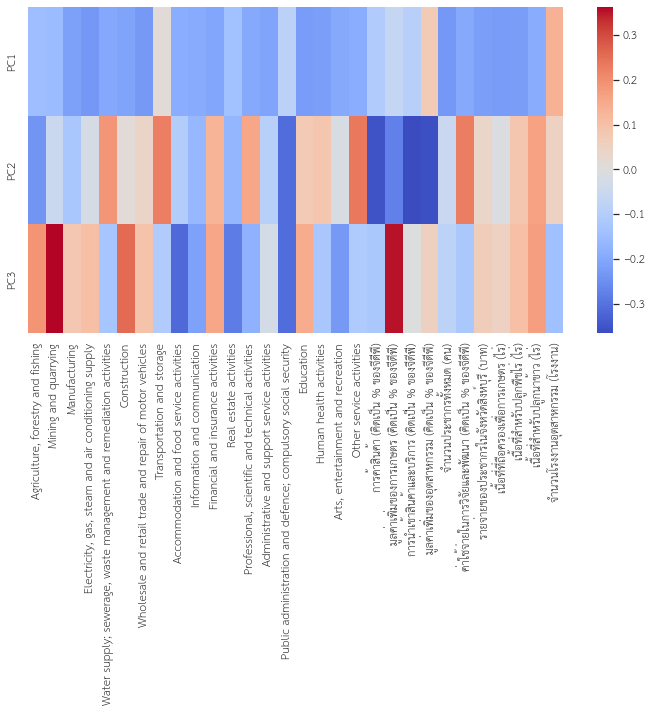

In [38]:
temp_df3 = pd.DataFrame(pca3.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 4

In [39]:
num_components=4
pca4 = PCA(n_components=num_components)
pca4.fit(sk_scaled_X_train)

PCA(n_components=4)

In [40]:
pca4.explained_variance_

array([18.49572355,  5.95011645,  2.52712881,  1.52122029])

In [41]:
pca4.components_

array([[-0.14821117, -0.15299466, -0.21585204, -0.23316444, -0.19798269,
        -0.20666178, -0.23107199,  0.01225461, -0.18658726, -0.19401648,
        -0.20406801, -0.13945617, -0.19625498, -0.20858431, -0.0849396 ,
        -0.22361493, -0.21979354, -0.19604259, -0.18764432, -0.10807515,
        -0.0638593 , -0.09413271,  0.06978086, -0.23215432, -0.19601023,
        -0.21816854, -0.22493141, -0.22238038, -0.18986784,  0.13407415],
       [-0.24006421, -0.05222119, -0.1245023 , -0.02278763,  0.18714036,
         0.01105088,  0.03881408,  0.22574558, -0.10394674, -0.16151539,
         0.12746258, -0.16796337,  0.15640569, -0.09377355, -0.30945201,
         0.07517974,  0.08533563, -0.01719415,  0.23742667, -0.35434517,
        -0.27625742, -0.36578014, -0.35744913, -0.05296724,  0.22661896,
         0.03569814, -0.00740031,  0.08616212,  0.16516298,  0.04904151],
       [ 0.19102452,  0.36270436,  0.08203331,  0.10115187, -0.12872407,
         0.25515774,  0.09302693, -0.10894308, -0

In [42]:
eig_pairs

[(17.3397408249113,
  array([ 0.14821117+0.j,  0.15299466+0.j,  0.21585204+0.j,  0.23316444+0.j,
          0.19798269+0.j,  0.20666178+0.j,  0.23107199+0.j, -0.01225461+0.j,
          0.18658726+0.j,  0.19401648+0.j,  0.20406801+0.j,  0.13945617+0.j,
          0.19625498+0.j,  0.20858431+0.j,  0.0849396 +0.j,  0.22361493+0.j,
          0.21979354+0.j,  0.19604259+0.j,  0.18764432+0.j,  0.10807515+0.j,
          0.0638593 +0.j,  0.09413271+0.j, -0.06978086+0.j,  0.23215432+0.j,
          0.19601023+0.j,  0.21816854+0.j,  0.22493141+0.j,  0.22238038+0.j,
          0.18986784+0.j, -0.13407415+0.j])),
 (5.578234168426899,
  array([ 0.24006421+0.j,  0.05222119+0.j,  0.1245023 +0.j,  0.02278763+0.j,
         -0.18714036+0.j, -0.01105088+0.j, -0.03881408+0.j, -0.22574558+0.j,
          0.10394674+0.j,  0.16151539+0.j, -0.12746258+0.j,  0.16796337+0.j,
         -0.15640569+0.j,  0.09377355+0.j,  0.30945201+0.j, -0.07517974+0.j,
         -0.08533563+0.j,  0.01719415+0.j, -0.23742667+0.j,  0.354

In [43]:
pca4.explained_variance_ratio_

array([0.57799136, 0.18594114, 0.07897278, 0.04753813])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

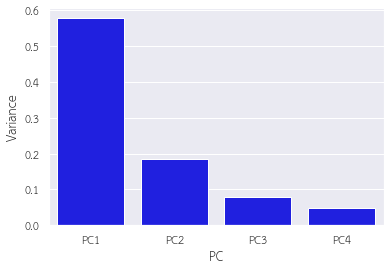

In [44]:
temp_df = pd.DataFrame({'Variance':pca4.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [45]:
sk_X_train_transformed  = pca4.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

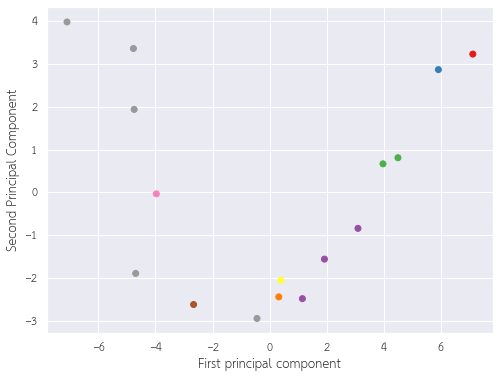

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [47]:
sk_derived_X_train = pca4.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-3.64964355e-01,  1.57896283e-01, -1.18667302e-01,
        -2.34923209e-01,  2.17556588e-01,  4.62196123e-01,
        -1.50453244e-01, -8.29077471e-01,  1.54098312e-01,
         4.20194240e-01,  5.97213077e-01, -7.88906367e-01,
         1.19321791e-01,  3.01524653e-01, -7.32196076e-02,
        -2.19289754e-01, -1.83101125e-01,  2.59232333e-02,
         2.70705157e-01, -2.18230265e-02, -6.41905804e-01,
         4.60125846e-01,  2.41019712e-01, -1.65878616e-01,
        -1.40683516e-02, -2.13457394e-01, -3.50998036e-02,
        -1.68845196e-01, -1.88793093e-01, -1.00691840e-01],
       [-3.67848642e-01,  3.84836511e-01,  1.64203718e-01,
         2.22918688e-01,  1.18407681e-01,  9.04478802e-02,
        -1.20338531e-01, -3.87317711e-01,  5.56810864e-02,
        -2.02078505e-01,  1.55262295e-01,  1.11099437e-01,
        -6.24834842e-01, -2.97016097e-02, -7.08672256e-03,
         1.77728478e-01,  2.65732242e-01, -1.02826971e-01,
         2.49199231e-01,  6.55385517e-02, -3.77515412e-

<AxesSubplot:>

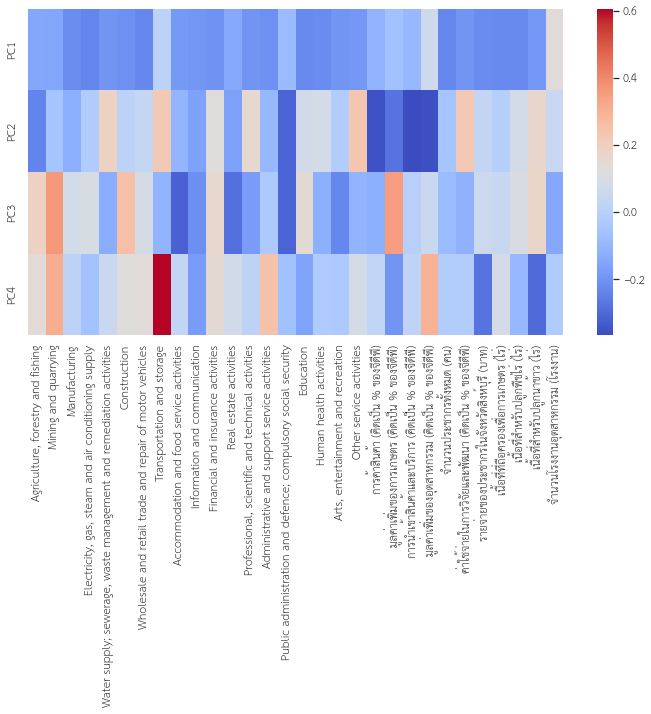

In [48]:
temp_df3 = pd.DataFrame(pca4.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 5

In [49]:
num_components=5
pca5 = PCA(n_components=num_components)
pca5.fit(sk_scaled_X_train)

PCA(n_components=5)

In [50]:
pca5.explained_variance_

array([18.49572355,  5.95011645,  2.52712881,  1.52122029,  0.94830812])

In [51]:
pca5.components_

array([[-0.14821117, -0.15299466, -0.21585204, -0.23316444, -0.19798269,
        -0.20666178, -0.23107199,  0.01225461, -0.18658726, -0.19401648,
        -0.20406801, -0.13945617, -0.19625498, -0.20858431, -0.0849396 ,
        -0.22361493, -0.21979354, -0.19604259, -0.18764432, -0.10807515,
        -0.0638593 , -0.09413271,  0.06978086, -0.23215432, -0.19601023,
        -0.21816854, -0.22493141, -0.22238038, -0.18986784,  0.13407415],
       [-0.24006421, -0.05222119, -0.1245023 , -0.02278763,  0.18714036,
         0.01105088,  0.03881408,  0.22574558, -0.10394674, -0.16151539,
         0.12746258, -0.16796337,  0.15640569, -0.09377355, -0.30945201,
         0.07517974,  0.08533563, -0.01719415,  0.23742667, -0.35434517,
        -0.27625742, -0.36578014, -0.35744913, -0.05296724,  0.22661896,
         0.03569814, -0.00740031,  0.08616212,  0.16516298,  0.04904151],
       [ 0.19102452,  0.36270436,  0.08203331,  0.10115187, -0.12872407,
         0.25515774,  0.09302693, -0.10894308, -0

In [52]:
eig_pairs

[(17.3397408249113,
  array([ 0.14821117+0.j,  0.15299466+0.j,  0.21585204+0.j,  0.23316444+0.j,
          0.19798269+0.j,  0.20666178+0.j,  0.23107199+0.j, -0.01225461+0.j,
          0.18658726+0.j,  0.19401648+0.j,  0.20406801+0.j,  0.13945617+0.j,
          0.19625498+0.j,  0.20858431+0.j,  0.0849396 +0.j,  0.22361493+0.j,
          0.21979354+0.j,  0.19604259+0.j,  0.18764432+0.j,  0.10807515+0.j,
          0.0638593 +0.j,  0.09413271+0.j, -0.06978086+0.j,  0.23215432+0.j,
          0.19601023+0.j,  0.21816854+0.j,  0.22493141+0.j,  0.22238038+0.j,
          0.18986784+0.j, -0.13407415+0.j])),
 (5.578234168426899,
  array([ 0.24006421+0.j,  0.05222119+0.j,  0.1245023 +0.j,  0.02278763+0.j,
         -0.18714036+0.j, -0.01105088+0.j, -0.03881408+0.j, -0.22574558+0.j,
          0.10394674+0.j,  0.16151539+0.j, -0.12746258+0.j,  0.16796337+0.j,
         -0.15640569+0.j,  0.09377355+0.j,  0.30945201+0.j, -0.07517974+0.j,
         -0.08533563+0.j,  0.01719415+0.j, -0.23742667+0.j,  0.354

In [53]:
pca5.explained_variance_ratio_

array([0.57799136, 0.18594114, 0.07897278, 0.04753813, 0.02963463])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

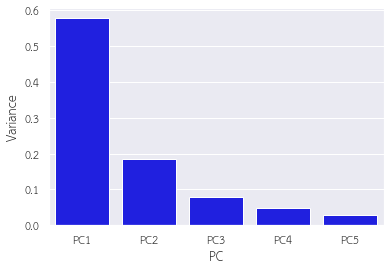

In [54]:
temp_df = pd.DataFrame({'Variance':pca5.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [55]:
sk_X_train_transformed  = pca5.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

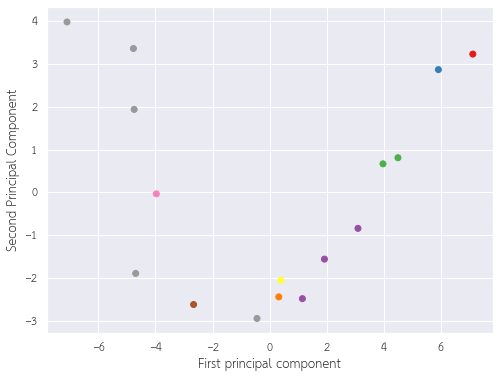

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [57]:
sk_derived_X_train = pca5.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-2.91459419e-01,  1.02396792e-01, -1.78913619e-01,
        -2.31033151e-01,  2.22452268e-01,  3.98470582e-01,
        -1.54242350e-01, -8.01530646e-01,  1.45748546e-01,
         4.33684933e-01,  5.48808833e-01, -7.65562143e-01,
         9.57219412e-02,  2.35839467e-01, -1.30249336e-01,
        -2.01675985e-01, -1.24733957e-01, -2.03078896e-02,
         2.26189082e-01,  8.55949620e-03, -6.98497772e-01,
         4.60830100e-01,  2.14616861e-01, -1.47424968e-01,
        -1.87473476e-02, -2.30424668e-01,  3.05750552e-02,
        -1.30742213e-01, -2.23533591e-01, -3.58779201e-01],
       [-2.22684986e-01,  2.75231504e-01,  4.52242853e-02,
         2.30601097e-01,  1.28076077e-01, -3.54026142e-02,
        -1.27821572e-01, -3.32915951e-01,  3.91912741e-02,
        -1.75435964e-01,  5.96695714e-02,  1.57201552e-01,
        -6.71441786e-01, -1.59422173e-01, -1.19713769e-01,
         2.12513612e-01,  3.81000575e-01, -1.94128034e-01,
         1.61285188e-01,  1.25540482e-01, -4.89277933e-

<AxesSubplot:>

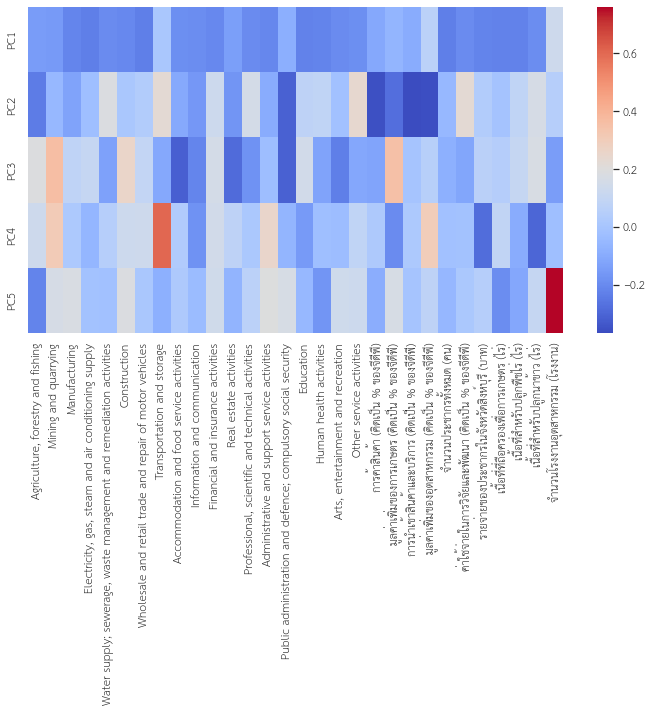

In [58]:
temp_df3 = pd.DataFrame(pca5.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')